In [501]:
## Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import to_categorical

In [502]:
## Load data

data = pd.read_csv("./titanic.csv", delimiter=",")
df = data
# Show data
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64
Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


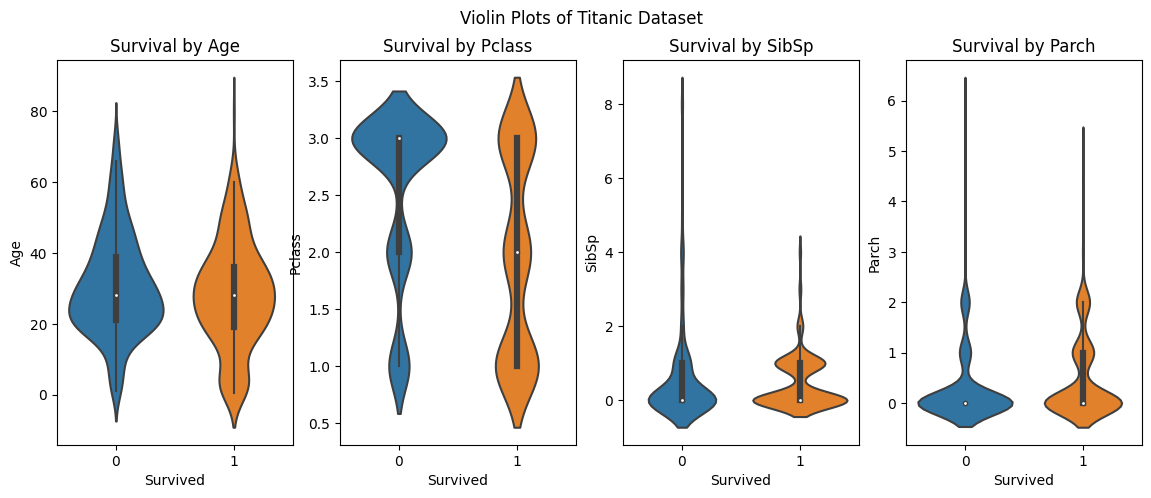

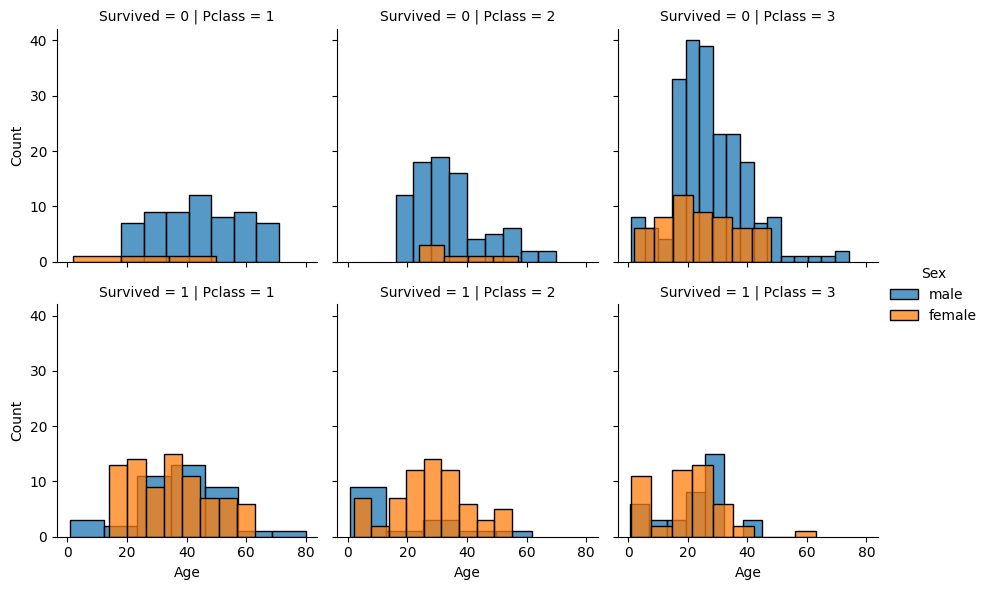

In [503]:
## Check an importance of each of the columns
data.describe()

# Take out the mean of each column
Pclass_mean = data.groupby("Pclass")["Survived"].mean()
Sex_mean = data.groupby("Sex")["Survived"].mean()
SibSp_mean = data.groupby("SibSp")["Survived"].mean()
Parch_mean = data.groupby("Parch")["Survived"].mean()

print(Sex_mean)
print(Pclass_mean)
print(SibSp_mean)
print(Parch_mean)

# Draw violin plots
fig, axes = plt.subplots(ncols=4, figsize=(14, 5))
sns.violinplot(data=df, x="Survived", y="Age", ax=axes[0])
axes[0].set_title('Survival by Age')
sns.violinplot(data=data, x="Survived", y="Pclass", ax=axes[1])
axes[1].set_title('Survival by Pclass')
sns.violinplot(data=data, x="Survived", y="SibSp", ax=axes[2])
axes[2].set_title('Survival by SibSp')
sns.violinplot(data=data, x="Survived", y="Parch", ax=axes[3])
axes[3].set_title('Survival by Parch')

fig.suptitle('Violin Plots of Titanic Dataset')

# Draw age histograms over survival and ticket class
g = sns.FacetGrid(data, col="Pclass", row="Survived", hue="Sex")
g.map_dataframe(sns.histplot, x="Age")
g.add_legend()

In [504]:
## Remove non relevant data
df = df.drop(["PassengerId", "Ticket", "Fare", "Embarked", "Name"], axis=1)

# The Parch data is removed because histogram shows no relevance to survival
df = df.drop("Parch", axis=1)

# Show cutted data
df.head(15)

,Survived,Pclass,Sex,Age,SibSp,Cabin
0,0,3,male,22.0,1,NaN
1,1,1,female,38.0,1,C85
2,1,3,female,26.0,0,NaN
3,1,1,female,35.0,1,C123
4,0,3,male,35.0,0,NaN
5,0,3,male,NaN,0,NaN
6,0,1,male,54.0,0,E46
7,0,3,male,2.0,3,NaN
8,1,3,female,27.0,0,NaN
9,1,2,female,14.0,1,NaN


In [505]:
## Show percentage of missing data in each column

for column in df:
    null_percentage = df[column].isnull().mean() * 100
    print("Percentage of null values in " + column + " is: {:.2f}%".format(null_percentage))

Percentage of null values in Survived is: 0.00%
Percentage of null values in Pclass is: 0.00%
Percentage of null values in Sex is: 0.00%
Percentage of null values in Age is: 19.87%
Percentage of null values in SibSp is: 0.00%
Percentage of null values in Cabin is: 77.10%


In [506]:
## Preprocess data

# We will extract the titles from Name column
#df["Title"] = df.Name.str.extract("([A-Za-z]+)", expand=False)
#pd.crosstab(df["Title"], df["Sex"])
#df = df.drop("Name", axis=1)

# Remove the Cabin data beacuase of the 80% of incomplete data
df = df.drop("Cabin", axis=1)    


# In case of age we will check the median of age for each of the Pclass and their Sex
median_age_by_Pclass_and_sex = df.groupby(['Pclass', 'Sex'])['Age'].median().to_dict()
print(median_age_by_Pclass_and_sex)

# Then we will change missing age to median corresponding with Pclass
for idx, row in enumerate(df["Age"]):
    if pd.isnull(df.iloc[idx, df.columns.get_loc("Age")]):
        df.iloc[idx, df.columns.get_loc("Age")] = median_age_by_Pclass_and_sex[df.iloc[idx].loc["Pclass"], df.iloc[idx].loc["Sex"]]

# Show completed data
df.head(15)


{(1, 'female'): 35.0, (1, 'male'): 40.0, (2, 'female'): 28.0, (2, 'male'): 30.0, (3, 'female'): 21.5, (3, 'male'): 25.0}


,Survived,Pclass,Sex,Age,SibSp
0,0,3,male,22.0,1
1,1,1,female,38.0,1
2,1,3,female,26.0,0
3,1,1,female,35.0,1
4,0,3,male,35.0,0
5,0,3,male,25.0,0
6,0,1,male,54.0,0
7,0,3,male,2.0,3
8,1,3,female,27.0,0
9,1,2,female,14.0,1


In [507]:
## Encoding categorical features

# In case of Pclass values will be turned around, so the lowest class has the highest importance etc.
df["Class_label"] = 0
Pclass_dict = {
    1: 3,
    2: 2,
    3: 1,
}
for idx, row in enumerate(df["Pclass"]):
    df.iloc[idx, df.columns.get_loc("Class_label")] = Pclass_dict[df.iloc[idx].loc["Pclass"]]
df.drop("Pclass", axis=1)

# In case of SibSp values will be turned around, so the lowest class has the highest importance etc.
df["SibSp_label"] = 0
Pclass_dict = {
    0: 7,
    1: 6,
    2: 5,
    3: 4,
    4: 3,
    5: 2,
    8: 1
}
for idx, row in enumerate(df["SibSp"]):
    df.iloc[idx, df.columns.get_loc("SibSp_label")] = Pclass_dict[df.iloc[idx].loc["SibSp"]]
df.drop("SibSp", axis=1)

# In case of Sex the one-hot encoding will be used
label_encoder = preprocessing.LabelEncoder()
integer_encoded = label_encoder.fit_transform(df["Sex"])

binary_encoded = to_categorical(integer_encoded)
df["Female"] = binary_encoded[:,0]
df["Male"] = binary_encoded[:,1]
df = df.drop("Sex", axis=1)

df.head(10)

,Survived,Pclass,Age,SibSp,Class_label,SibSp_label,Female,Male
0,0,3,22.0,1,1,6,0.0,1.0
1,1,1,38.0,1,3,6,1.0,0.0
2,1,3,26.0,0,1,7,1.0,0.0
3,1,1,35.0,1,3,6,1.0,0.0
4,0,3,35.0,0,1,7,0.0,1.0
5,0,3,25.0,0,1,7,0.0,1.0
6,0,1,54.0,0,3,7,0.0,1.0
7,0,3,2.0,3,1,4,0.0,1.0
8,1,3,27.0,0,1,7,1.0,0.0
9,1,2,14.0,1,2,6,1.0,0.0


In [508]:
## Train Test Split

# Prepare data Train Test Spli
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Perform Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.8, shuffle=True)


In [512]:
## Normalize the Data
X_train_norm = preprocessing.normalize(X_train, axis=0)
X_test_norm = preprocessing.normalize(X_train, axis=0)

print(X_test_norm)

[[0.09302605 0.0476741  0.05447347 ... 0.06887458 0.12038585 0.        ]
 [0.06201737 0.06652199 0.         ... 0.08035368 0.         0.09578263]
 [0.09302605 0.10643519 0.05447347 ... 0.06887458 0.12038585 0.        ]
 ...
 [0.09302605 0.07539159 0.         ... 0.08035368 0.         0.09578263]
 [0.03100868 0.11973959 0.05447347 ... 0.06887458 0.12038585 0.        ]
 [0.09302605 0.0487828  0.         ... 0.08035368 0.         0.09578263]]


In [ ]:
## 